In [ ]:
# test cusp result for seqence
# Cusp website: https://www.bioinformatics.nl/cgi-bin/emboss/cusp

# 这个例子运行pyCUBs库， 从而获得一个与Cusp在线工具一致的结果。

import sys
sys.path.append('/mnt/nfs1/jupyter/pyCUBs/') #填写pyCuBs库的路径

import pycubcore #导入pyCuBs库的核心模块

# 测试的cds序列
seqence = "ATGCTAGACATCTTAACAAGCCACTTAATTAACCCCCTAGCCTACGCCGTACCAGTATTAATTGCAGTAGCCTTCCTTACCTTAGTTGAACGAAAAGTGTTAGGCTATATACAACTCCGAAAAGGACCAAATGTAATAGGCCCCCGAGGACTGTTACAATCAGTAGCTGATGGCGTGAAACTTTTTATTAAAGAACCCATTCGACCATCTATGGCTTCTCCAATTTTATTTTTAACAGCTCCAGTTCTTGCACTAATCCTAGCAATAATGCTATGGGCACCCATACCCATGCCCTATCCAGTACTCGACCTAAATCTTGGAATTTTATTTATTATAGCCATCTCAAGCCTAGCAGTATACTCAATCCTGGGATCAGGTTGAGCATCAAACTCAAAATACGCATTAATTGGGGCCTTACGAGCTGTAGCGCAAACAATTTCATATGAAGTTAGCCTAGGACTTATTCTATTATCTGCCGTTATTTTTTCTGGGGGATACACCCTACAAACATTTAATACAACTCAGGAAGACACATGACTTCTACTTCCACTATGACCATTAGCCATTATATGATTTATCTCAACGCTGGCAGAAACAAACCGAGCACCGTTCGATCTTACAGAGGGGGAATCAGAACTAGTCTCAGGCTTCAATGTAGAGTATGCAGCAGGACCATTTGCCTTATTCTTTTTGGCTGAGTACTCAAATATTTTACTAATAAACACCCACTCAACAGTACTATTTTTAGGAGCATCGTTTACCCCAGATGCACCTGAGCTAATAACAATCAGTATTGCAACCAAAACTGCAATACTATCTATTTTGTTTCTCTGAATACGAGCATCATACCCACGATTCCGATACGACCAACTTATGCATCTTATCTGGAAAAACTTTCTTCCAATCACATTAGTTCTAGTACTATGACATATCGCCCTACCAATCGCACTAGCTGGTCTACCCCCACAAACATAA"

obs = pycubcore.GetObs(seqence, Genetic_Codes=1, aaSeq3=False) # aaSeq3=False 则会将氨基酸三字符显示为单字符，如脯氨酸（Pro-->P), Genetic_Codes=1为标准密码子表
CupsResult = pycubcore.GetCusp(obs, human_format=True) # human_format=True 会显示一个人类友好型的格式，这个格式与Cusp在线工具的结果一致， 若为False返回一个机器友好性的列表
print("GetCusp函数运行的Cups结果: \n")
print(CupsResult)

# 事实上这个测试序列是斑马鱼线粒体基因组中的 NADH dehydrogenase subunit 1 基因，
# 然而cups不支持遗传密码子的选择，在这个库中，codontables模块被开发用于解决这一问题，
# 在这个例子中只需将pycubcore.GetObs函数中的Genetic_Codes参数改为2,就可以得到正确的分析结果。
# 遗传密码子表可以通过下面代码获得， 数据是从这个网站获得： https://www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi?chapter=tgencodes

import codontables
print("遗传密码子表：\n", codontables.CodonTables())
print("遗传密码子表数：", len(codontables.CodonTables()))

#获得标准密码子表的代码如下：
print("标准密码子表:", codontables.CodonTables().get(1, aaSeq3=True))

# Cusp Website result
Cusp_Website_result = """
#Coding GC 40.31%
#1st letter GC 52.00%
#2nd letter GC 40.92%
#3rd letter GC 28.00%

#Codon AA Fraction Frequency Number
GCA    A     0.515    52.308     17
GCC    A     0.273    27.692      9
GCG    A     0.030     3.077      1
GCT    A     0.182    18.462      6
TGC    C     0.000     0.000      0
TGT    C     0.000     0.000      0
GAC    D     0.571    12.308      4
GAT    D     0.429     9.231      3
GAA    E     0.636    21.538      7
GAG    E     0.364    12.308      4
TTC    F     0.294    15.385      5
TTT    F     0.706    36.923     12
GGA    G     0.471    24.615      8
GGC    G     0.235    12.308      4
GGG    G     0.176     9.231      3
GGT    G     0.118     6.154      2
CAC    H     0.500     6.154      2
CAT    H     0.500     6.154      2
ATA    I     0.286    30.769     10
ATC    I     0.286    30.769     10
ATT    I     0.429    46.154     15
AAA    K     1.000    21.538      7
AAG    K     0.000     0.000      0
CTA    L     0.379    67.692     22
CTC    L     0.052     9.231      3
CTG    L     0.052     9.231      3
CTT    L     0.190    33.846     11
TTA    L     0.293    52.308     17
TTG    L     0.034     6.154      2
ATG    M     1.000    15.385      5
AAC    N     0.500    15.385      5
AAT    N     0.500    15.385      5
CCA    P     0.609    43.077     14
CCC    P     0.304    21.538      7
CCG    P     0.043     3.077      1
CCT    P     0.043     3.077      1
CAA    Q     0.857    18.462      6
CAG    Q     0.143     3.077      1
AGA    R     0.000     0.000      0
AGG    R     0.000     0.000      0
CGA    R     1.000    27.692      9
CGC    R     0.000     0.000      0
CGG    R     0.000     0.000      0
CGT    R     0.000     0.000      0
AGC    S     0.130     9.231      3
AGT    S     0.043     3.077      1
TCA    S     0.565    40.000     13
TCC    S     0.000     0.000      0
TCG    S     0.043     3.077      1
TCT    S     0.217    15.385      5
ACA    T     0.600    36.923     12
ACC    T     0.250    15.385      5
ACG    T     0.050     3.077      1
ACT    T     0.100     6.154      2
GTA    V     0.579    33.846     11
GTC    V     0.053     3.077      1
GTG    V     0.105     6.154      2
GTT    V     0.263    15.385      5
TGG    W     1.000     6.154      2
TAC    Y     0.636    21.538      7
TAT    Y     0.364    12.308      4
TAA    *     0.143     3.077      1
TAG    *     0.000     0.000      0
TGA    *     0.857    18.462      6
"""

In [ ]:
# 这个例子运行pyCUBs库， 从而获得一个与codonW在线工具一致的结果。
import sys
sys.path.append('/mnt/nfs1/jupyter/pyCUBs/')

import pycubcore

seqence = "ATGCTAGACATCTTAACAAGCCACTTAATTAACCCCCTAGCCTACGCCGTACCAGTATTAATTGCAGTAGCCTTCCTTACCTTAGTTGAACGAAAAGTGTTAGGCTATATACAACTCCGAAAAGGACCAAATGTAATAGGCCCCCGAGGACTGTTACAATCAGTAGCTGATGGCGTGAAACTTTTTATTAAAGAACCCATTCGACCATCTATGGCTTCTCCAATTTTATTTTTAACAGCTCCAGTTCTTGCACTAATCCTAGCAATAATGCTATGGGCACCCATACCCATGCCCTATCCAGTACTCGACCTAAATCTTGGAATTTTATTTATTATAGCCATCTCAAGCCTAGCAGTATACTCAATCCTGGGATCAGGTTGAGCATCAAACTCAAAATACGCATTAATTGGGGCCTTACGAGCTGTAGCGCAAACAATTTCATATGAAGTTAGCCTAGGACTTATTCTATTATCTGCCGTTATTTTTTCTGGGGGATACACCCTACAAACATTTAATACAACTCAGGAAGACACATGACTTCTACTTCCACTATGACCATTAGCCATTATATGATTTATCTCAACGCTGGCAGAAACAAACCGAGCACCGTTCGATCTTACAGAGGGGGAATCAGAACTAGTCTCAGGCTTCAATGTAGAGTATGCAGCAGGACCATTTGCCTTATTCTTTTTGGCTGAGTACTCAAATATTTTACTAATAAACACCCACTCAACAGTACTATTTTTAGGAGCATCGTTTACCCCAGATGCACCTGAGCTAATAACAATCAGTATTGCAACCAAAACTGCAATACTATCTATTTTGTTTCTCTGAATACGAGCATCATACCCACGATTCCGATACGACCAACTTATGCATCTTATCTGGAAAAACTTTCTTCCAATCACATTAGTTCTAGTACTATGACATATCGCCCTACCAATCGCACTAGCTGGTCTACCCCCACAAACATAA"
Obs = pycubcore.GetObs(Seqs=seqence, Genetic_Codes=1)
print(pycubcore.GetcodonW(Obs, human_format=True))

# codonW software result
# T3s     C3s     A3s     G3s     CAI     CBI     Fop     Nc      GC3s    GC      L_sym   L_aa    Gravy   Aromo   
# 0.2587  0.2273  0.5840  0.0837  0.124   -0.173  0.273   40.14   0.270   0.406   311     318     0.877358        0.094340



RSCU:

 {'Phe': {'TTT': 1.411764705882353, 'TTC': 0.5882352941176471}, 'Ser': {'TCT': 1.3043478260869565, 'TCC': 0.0, 'TCA': 3.391304347826087, 'TCG': 0.2608695652173913, 'AGT': 0.2608695652173913, 'AGC': 0.782608695652174}, 'Tyr': {'TAT': 0.7272727272727273, 'TAC': 1.2727272727272727}, 'Cys': {}, 'Leu': {'TTA': 1.7586206896551724, 'TTG': 0.20689655172413793, 'CTT': 1.1379310344827587, 'CTC': 0.3103448275862069, 'CTA': 2.2758620689655173, 'CTG': 0.3103448275862069}, '*': {'TAA': 4.0, 'TAG': 0.0, 'AGA': 0.0, 'AGG': 0.0}, 'Trp': {'TGA': 1.5, 'TGG': 0.5}, 'Pro': {'CCT': 0.17391304347826086, 'CCC': 1.2173913043478262, 'CCA': 2.4347826086956523, 'CCG': 0.17391304347826086}, 'His': {'CAT': 1.0, 'CAC': 1.0}, 'Arg': {'CGT': 0.0, 'CGC': 0.0, 'CGA': 4.0, 'CGG': 0.0}, 'Gln': {'CAA': 1.7142857142857142, 'CAG': 0.2857142857142857}, 'Ile': {'ATT': 1.2, 'ATC': 0.8}, 'Thr': {'ACT': 0.4, 'ACC': 1.0, 'ACA': 2.4, 'ACG': 0.2}, 'Asn': {'AAT': 1.0, 'AAC': 1.0}, 'Met': {'ATA': 1.3333333333333333, 'ATG': 0.6

FileNotFoundError: [Errno 2] No such file or directory: 'Dre.mt.cds.fasta'

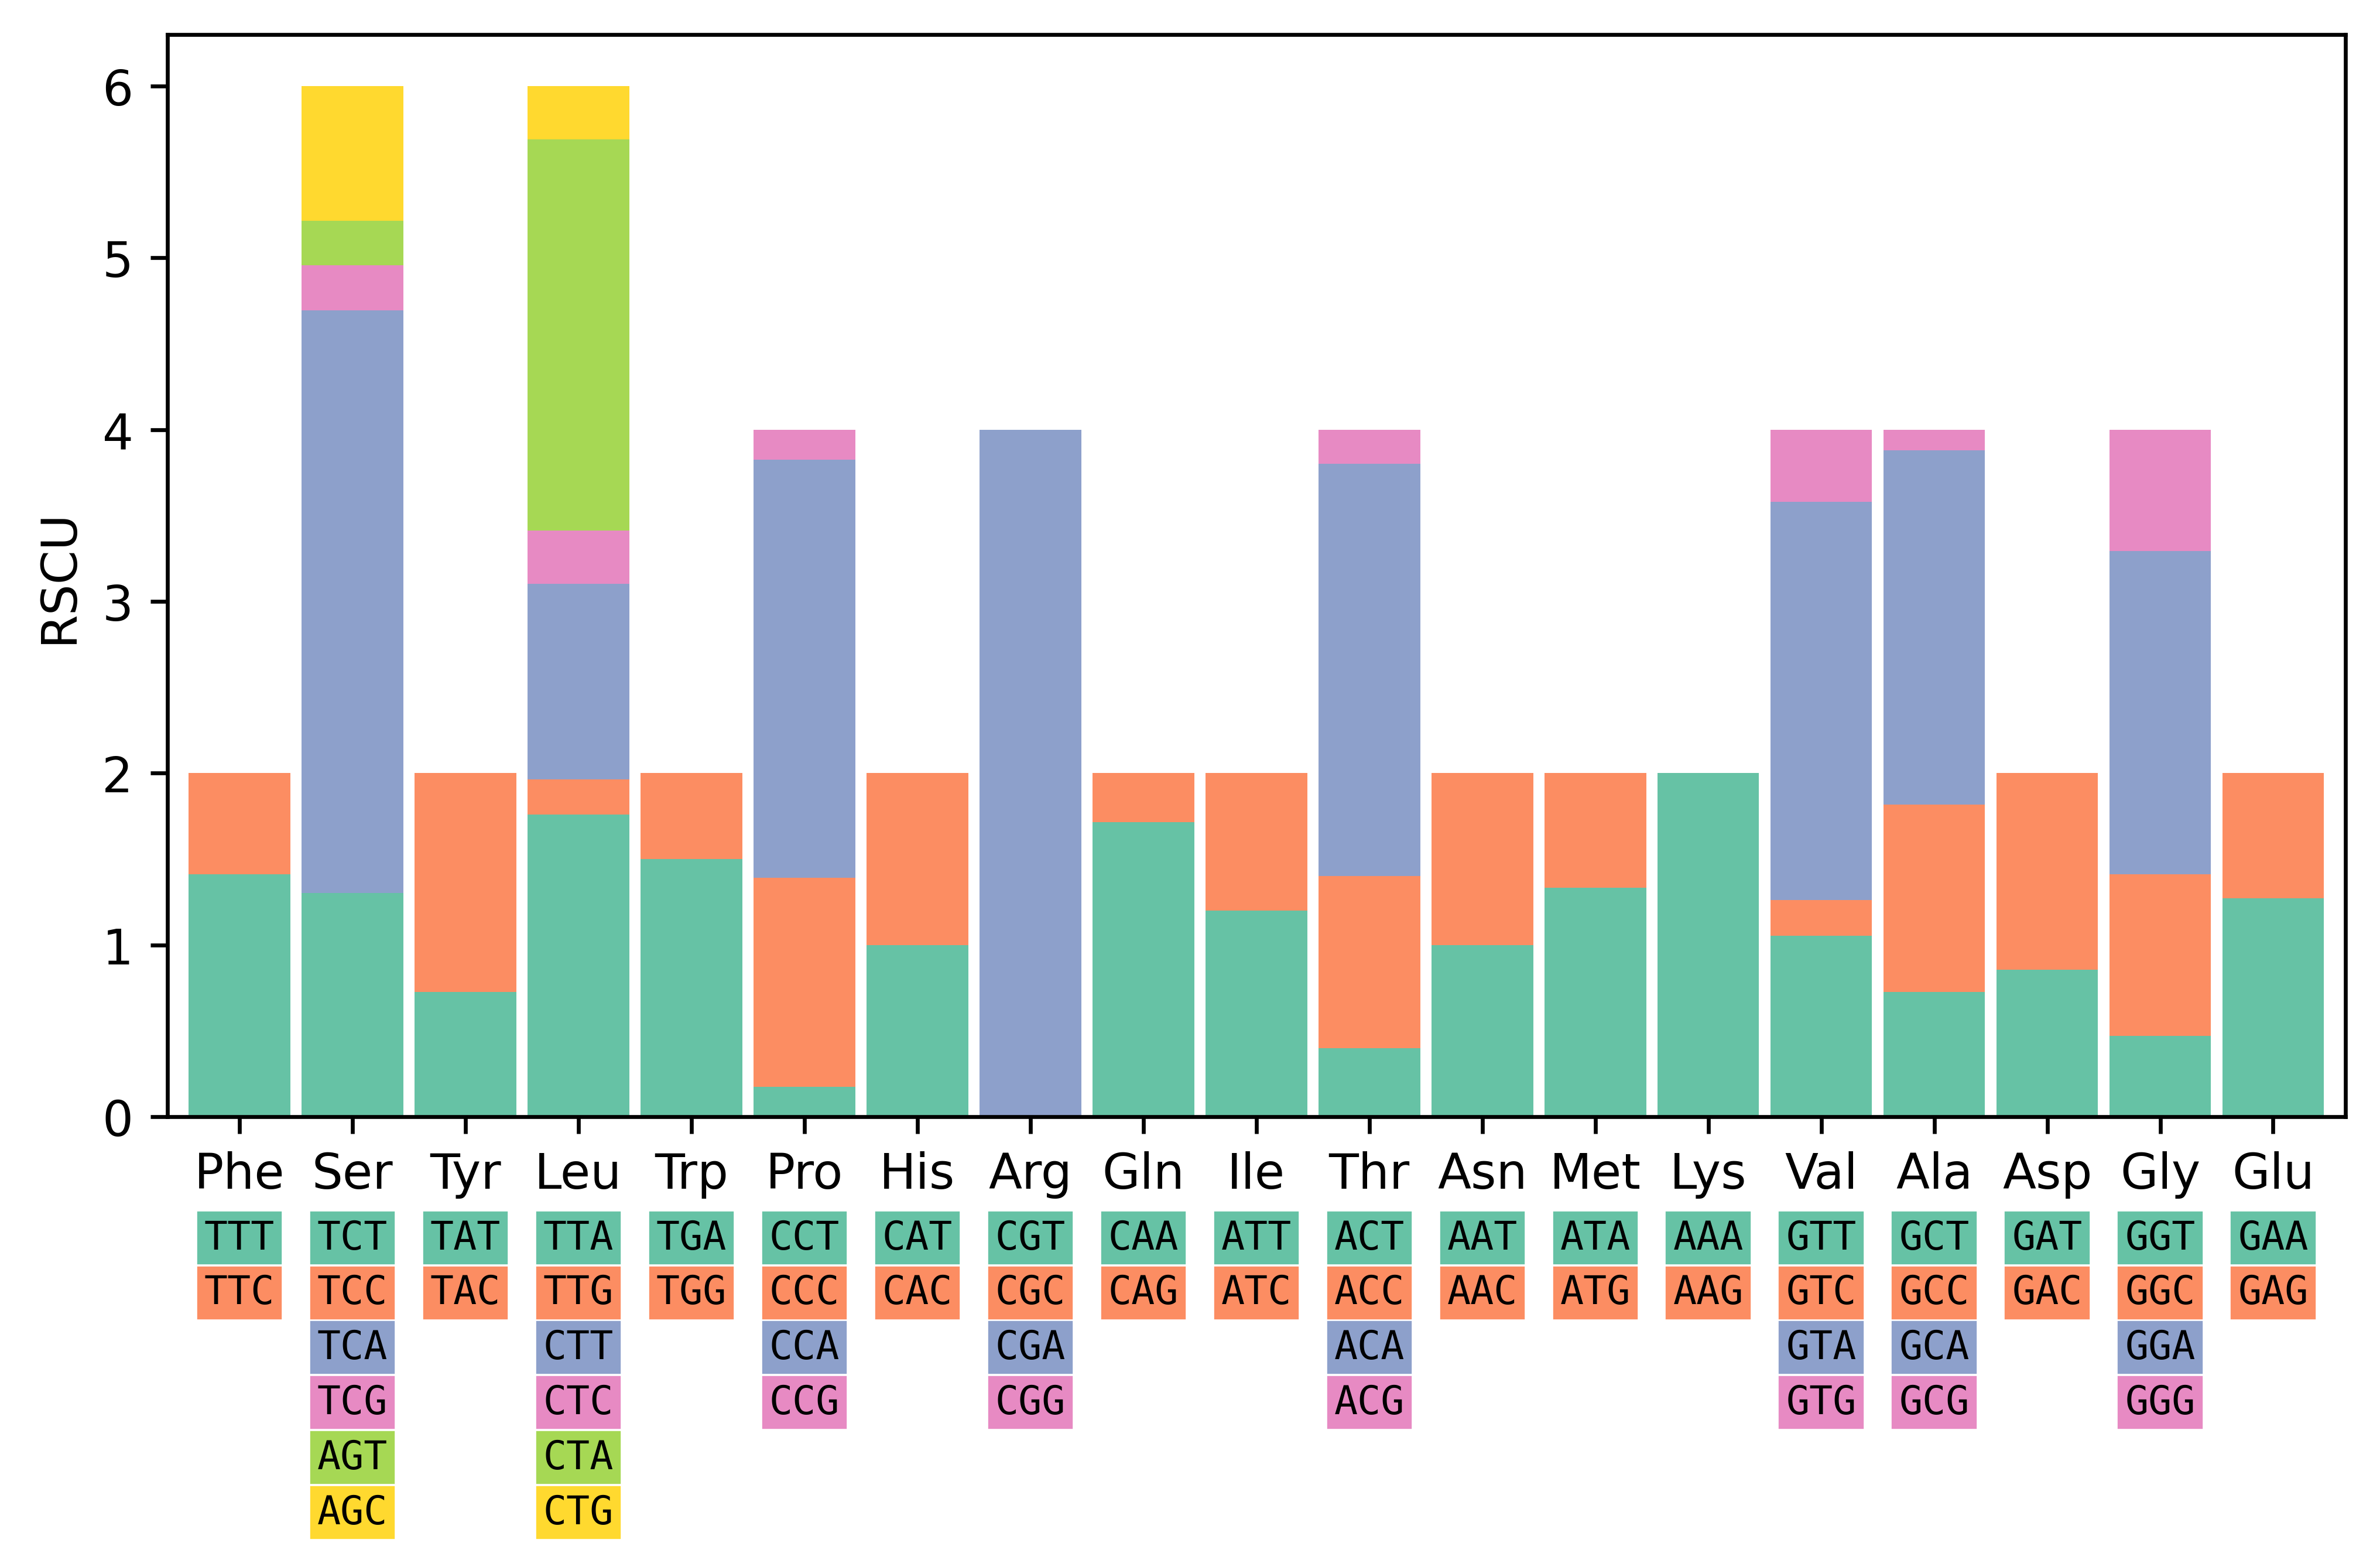

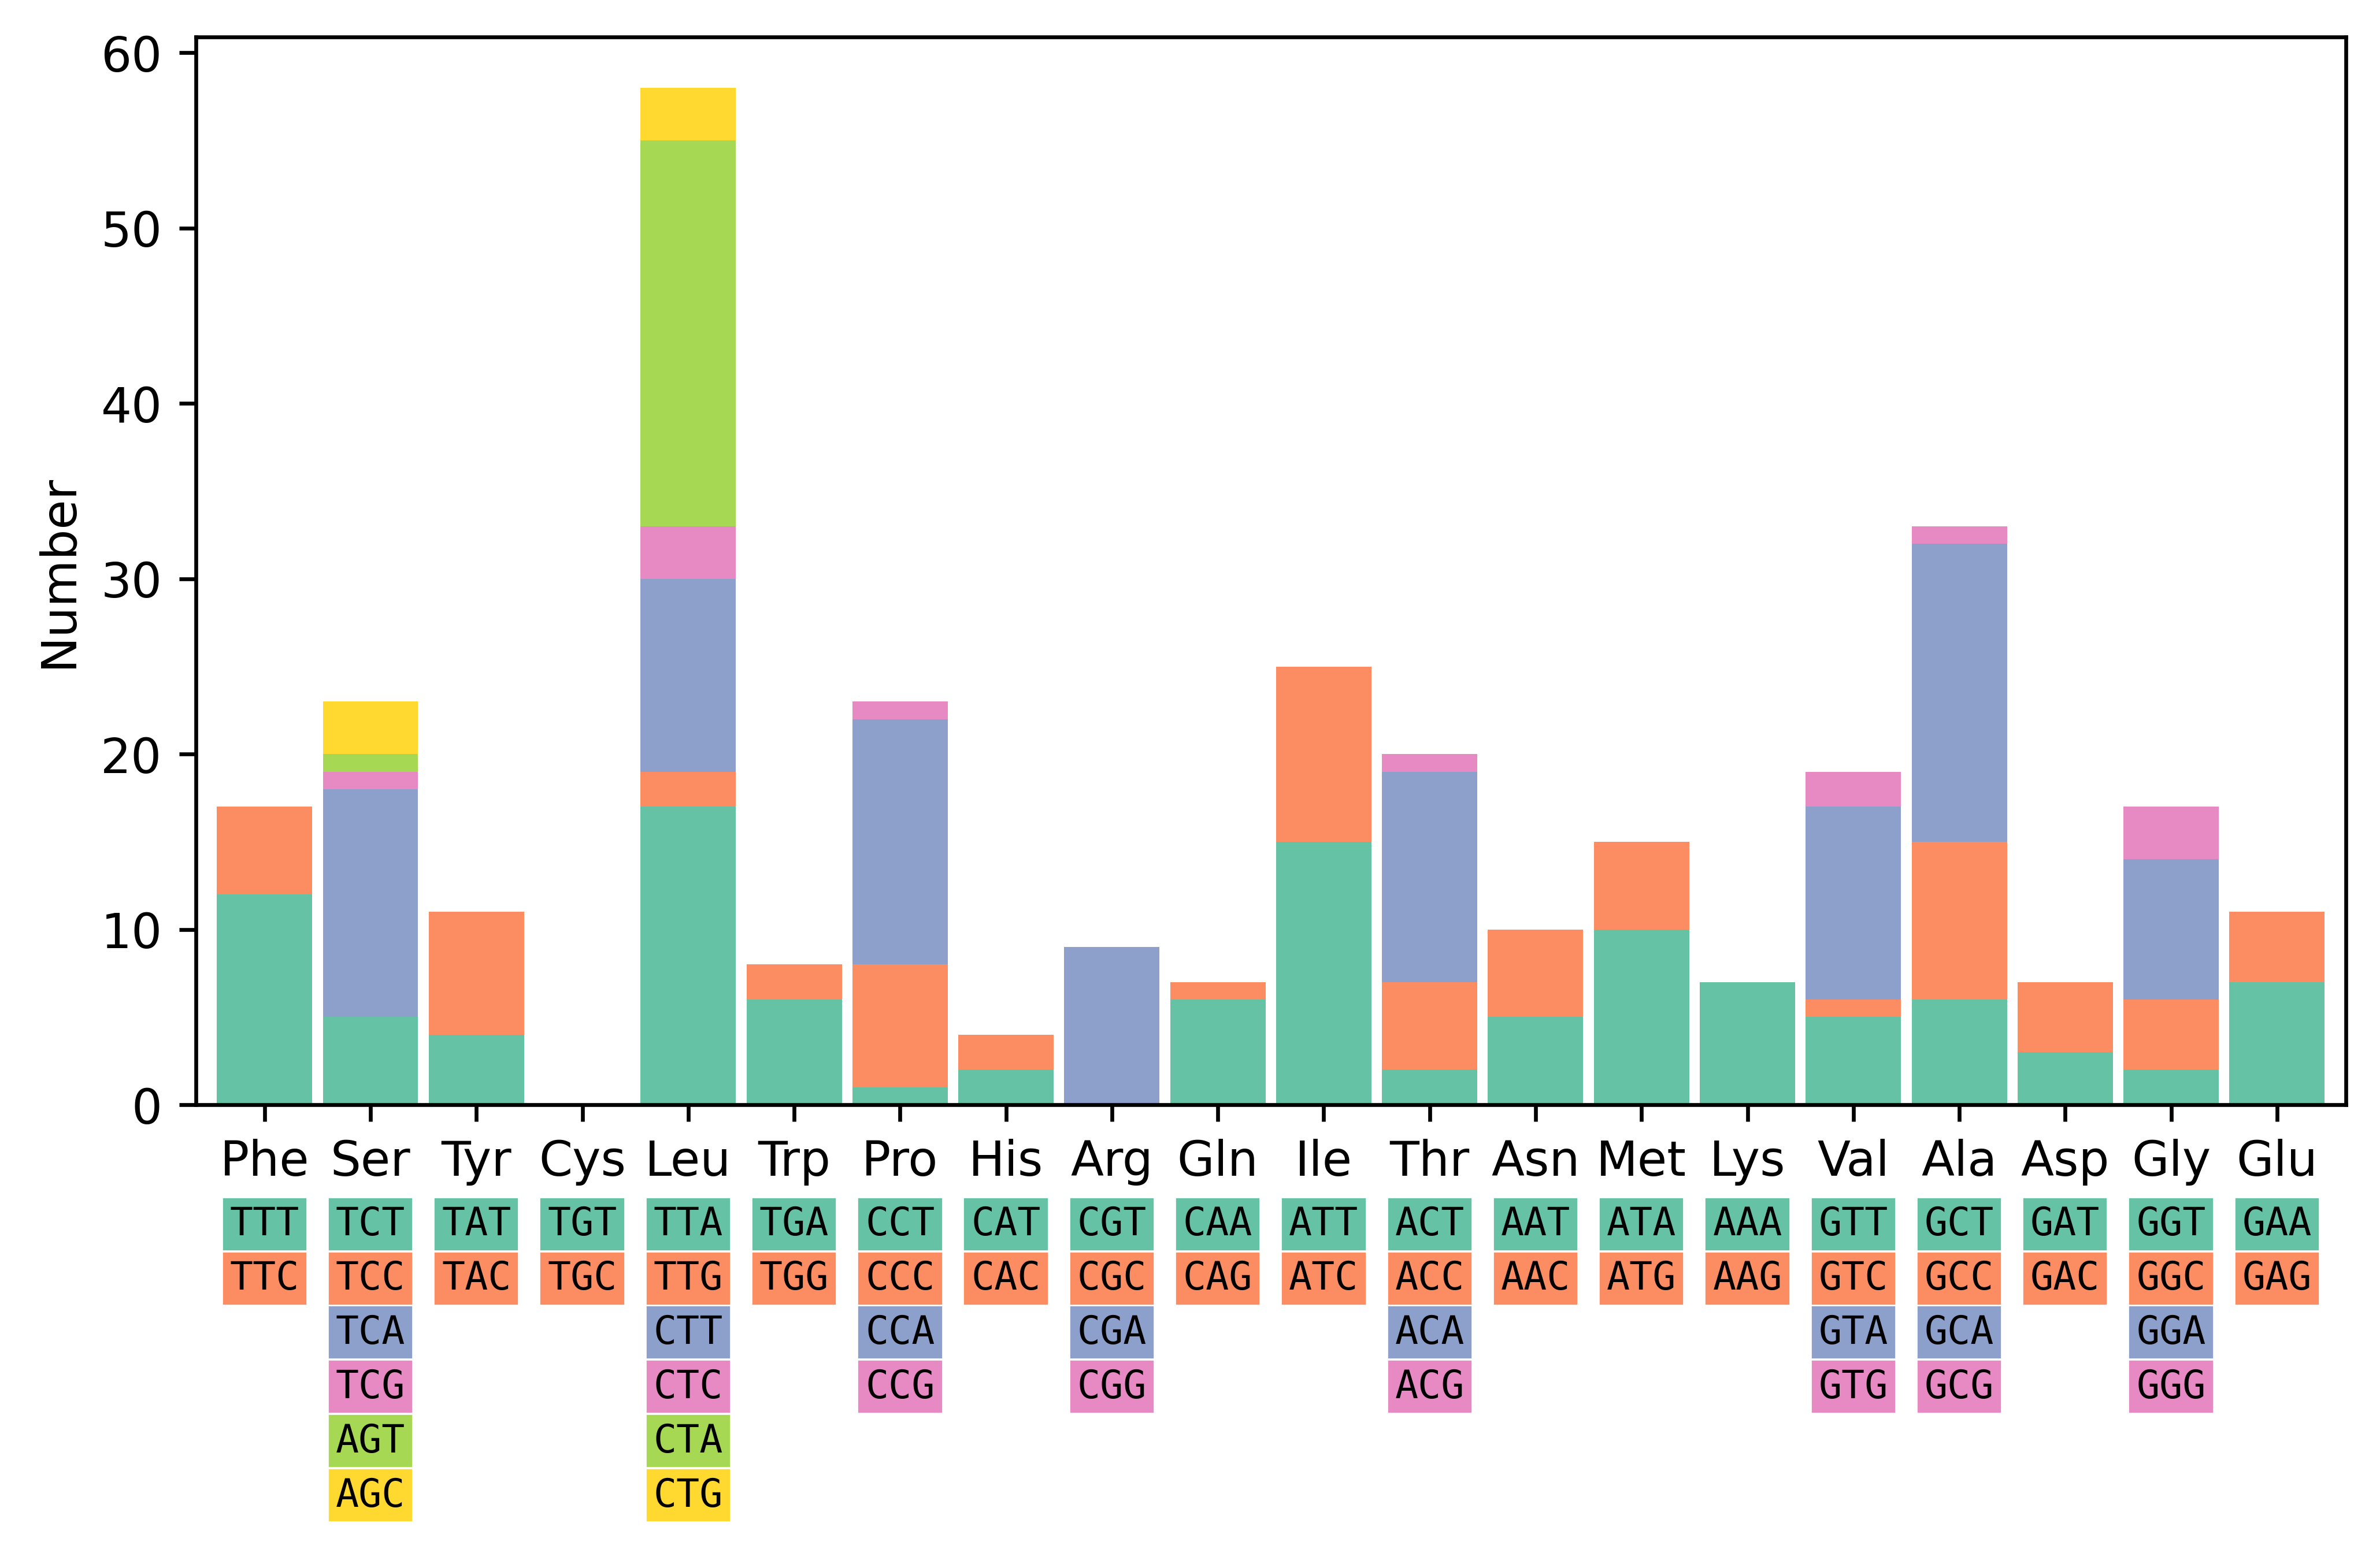

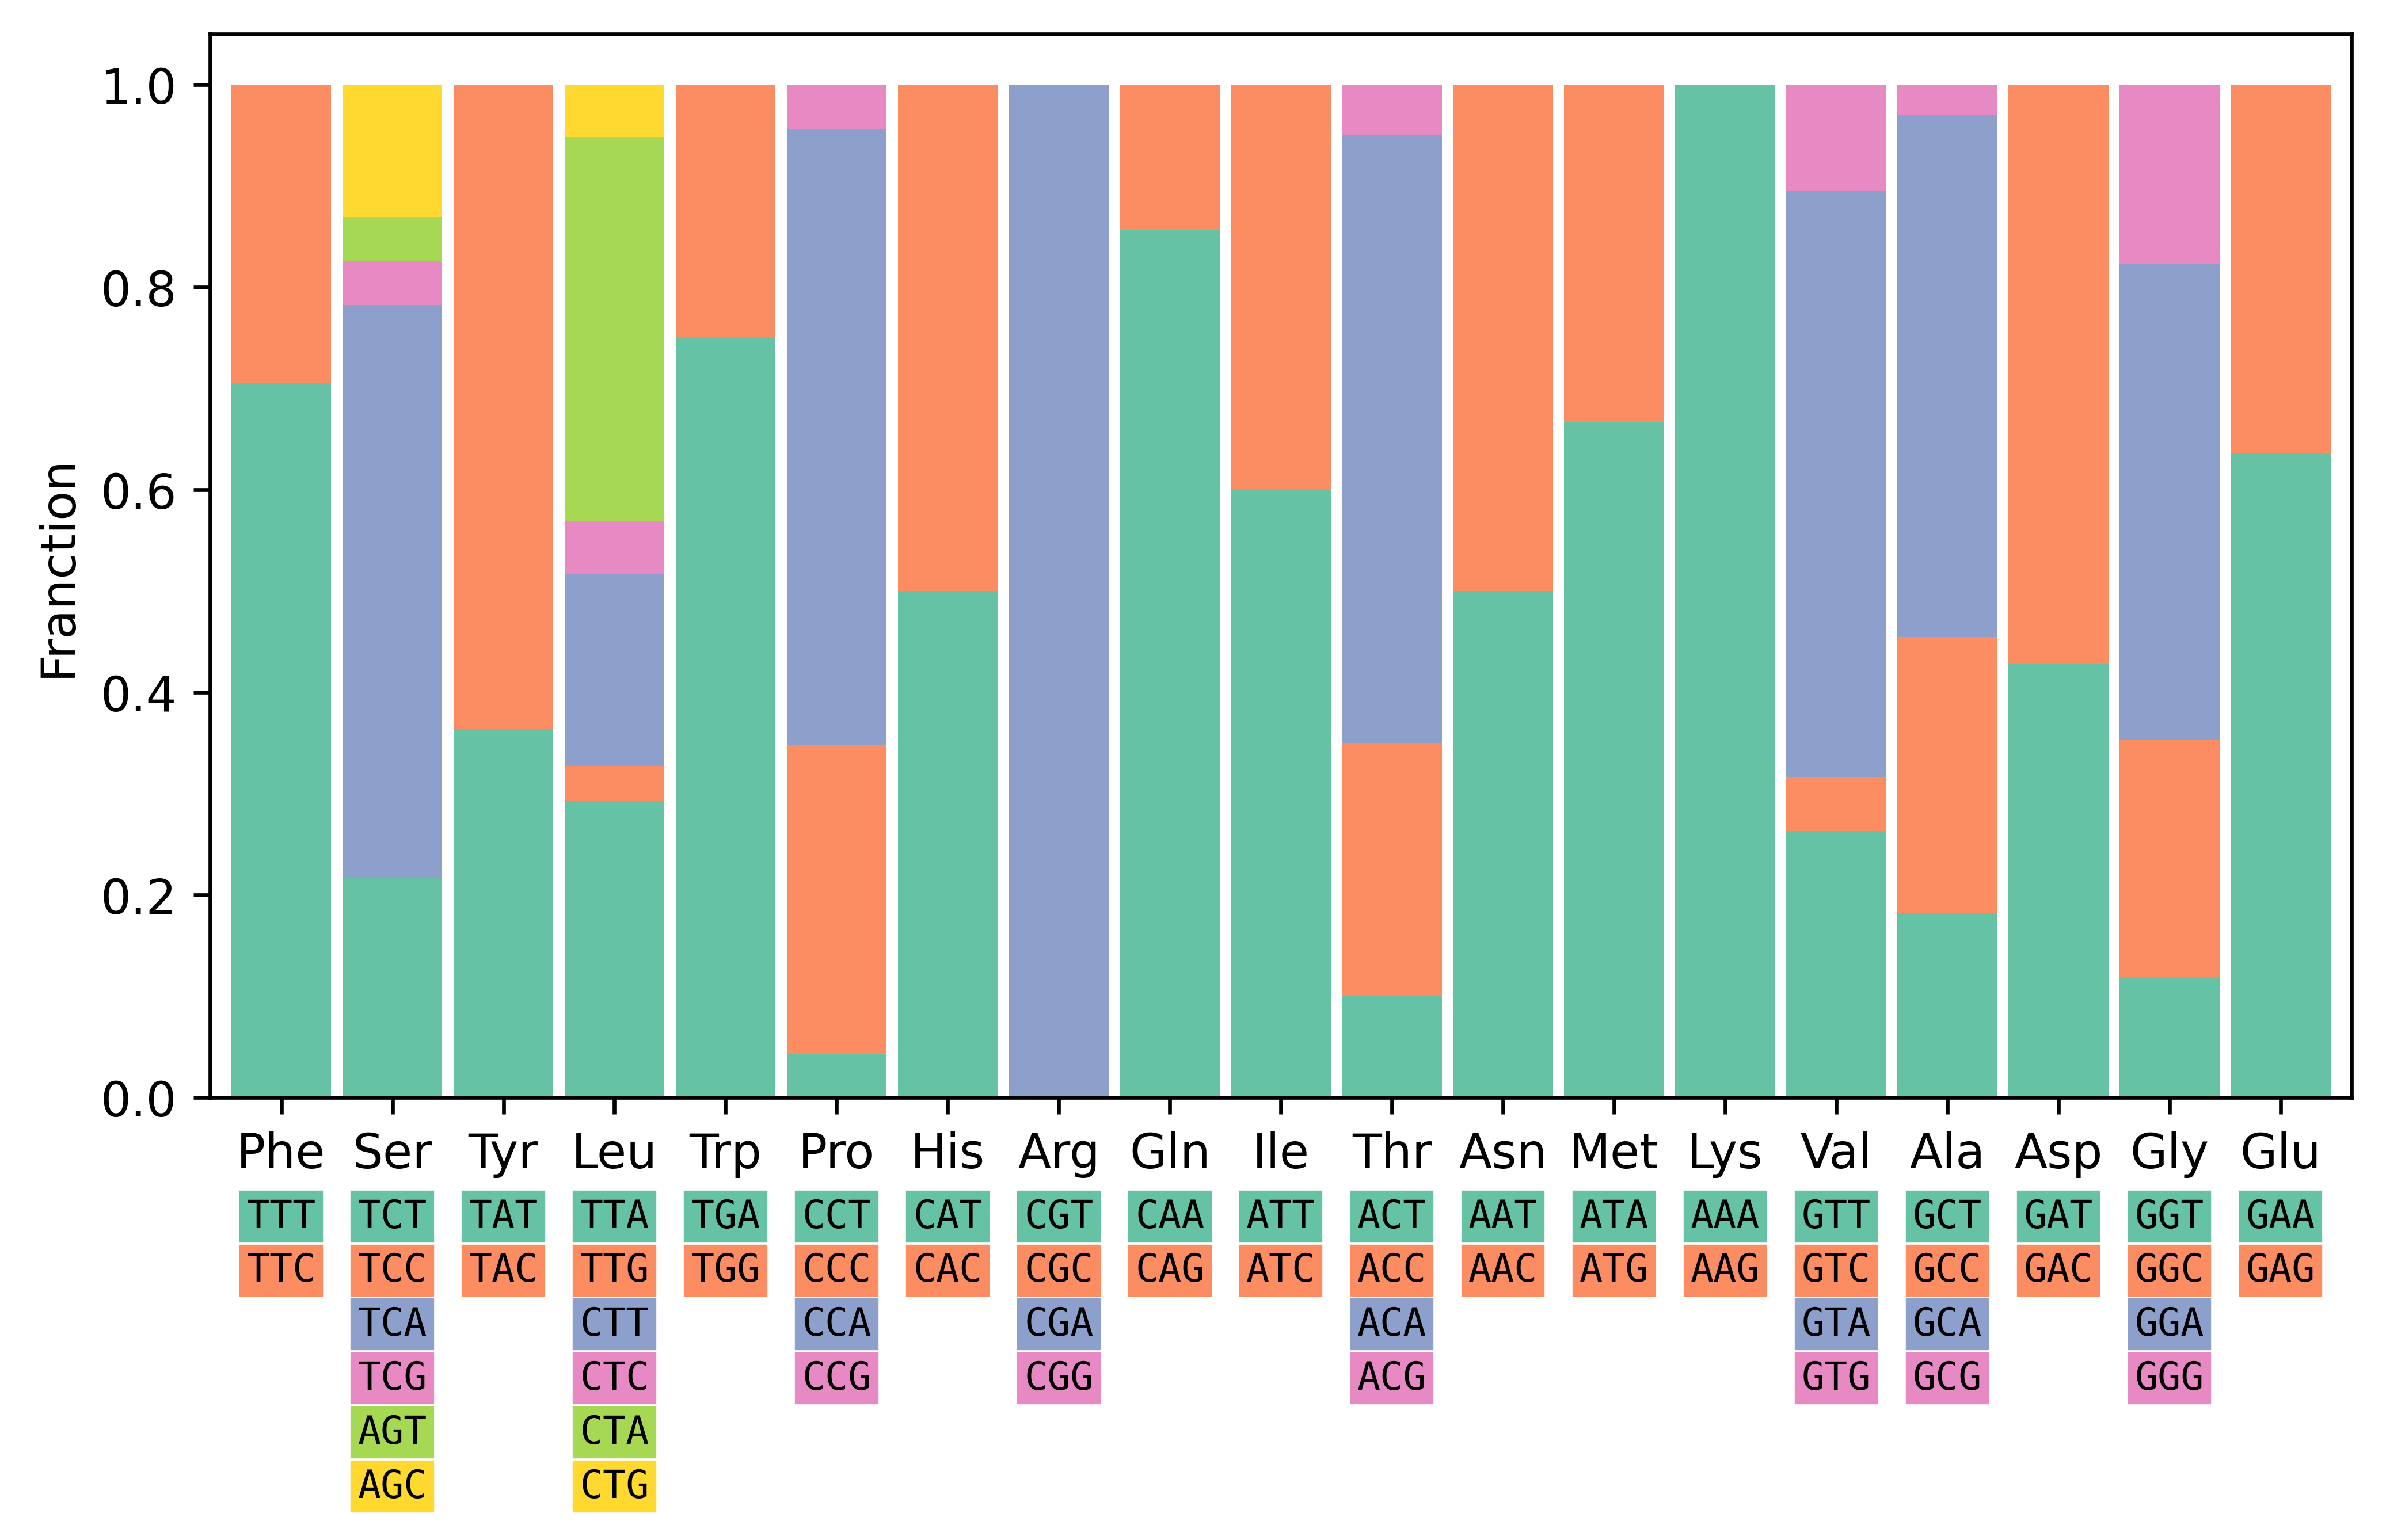

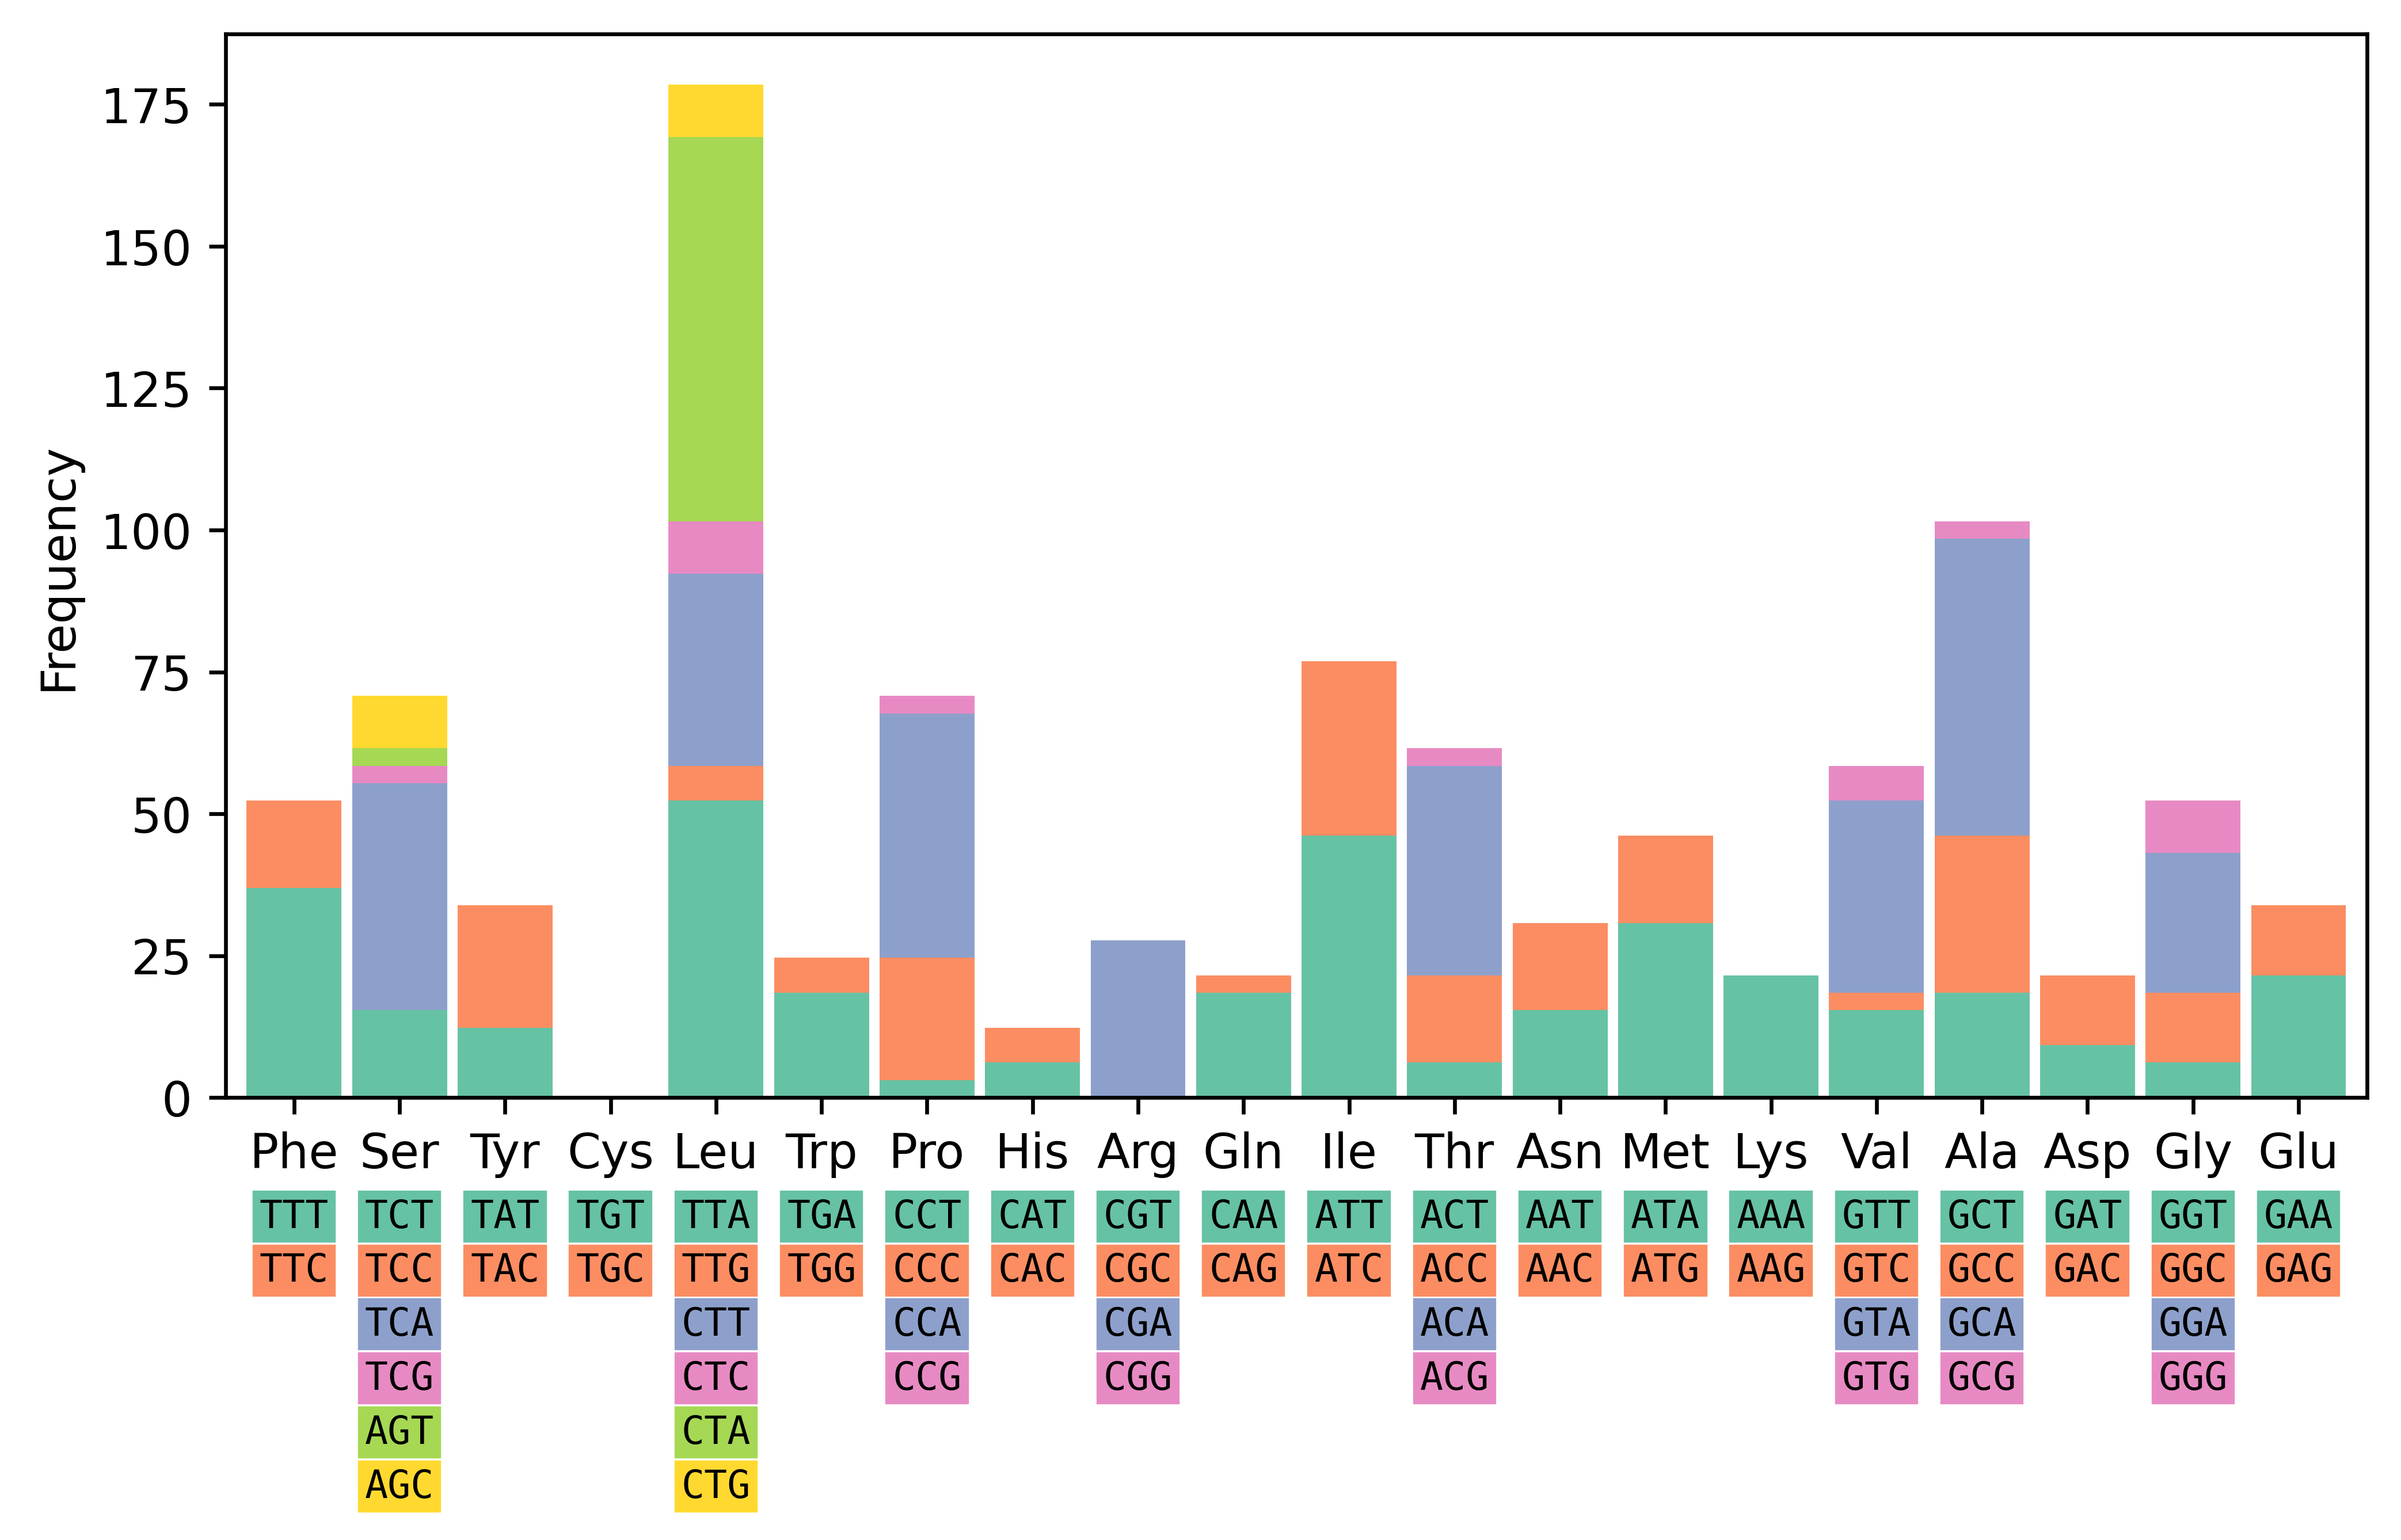

In [2]:
# 这个例子运行pyCUBs库， 从而获得一个基因或者一个物种的RUSU， Obs, Franction, Frequency并绘图

import sys
sys.path.append('/mnt/nfs1/jupyter/pyCUBs/')

import pycubcore

# 测试的cds序列
seqence = "ATGCTAGACATCTTAACAAGCCACTTAATTAACCCCCTAGCCTACGCCGTACCAGTATTAATTGCAGTAGCCTTCCTTACCTTAGTTGAACGAAAAGTGTTAGGCTATATACAACTCCGAAAAGGACCAAATGTAATAGGCCCCCGAGGACTGTTACAATCAGTAGCTGATGGCGTGAAACTTTTTATTAAAGAACCCATTCGACCATCTATGGCTTCTCCAATTTTATTTTTAACAGCTCCAGTTCTTGCACTAATCCTAGCAATAATGCTATGGGCACCCATACCCATGCCCTATCCAGTACTCGACCTAAATCTTGGAATTTTATTTATTATAGCCATCTCAAGCCTAGCAGTATACTCAATCCTGGGATCAGGTTGAGCATCAAACTCAAAATACGCATTAATTGGGGCCTTACGAGCTGTAGCGCAAACAATTTCATATGAAGTTAGCCTAGGACTTATTCTATTATCTGCCGTTATTTTTTCTGGGGGATACACCCTACAAACATTTAATACAACTCAGGAAGACACATGACTTCTACTTCCACTATGACCATTAGCCATTATATGATTTATCTCAACGCTGGCAGAAACAAACCGAGCACCGTTCGATCTTACAGAGGGGGAATCAGAACTAGTCTCAGGCTTCAATGTAGAGTATGCAGCAGGACCATTTGCCTTATTCTTTTTGGCTGAGTACTCAAATATTTTACTAATAAACACCCACTCAACAGTACTATTTTTAGGAGCATCGTTTACCCCAGATGCACCTGAGCTAATAACAATCAGTATTGCAACCAAAACTGCAATACTATCTATTTTGTTTCTCTGAATACGAGCATCATACCCACGATTCCGATACGACCAACTTATGCATCTTATCTGGAAAAACTTTCTTCCAATCACATTAGTTCTAGTACTATGACATATCGCCCTACCAATCGCACTAGCTGGTCTACCCCCACAAACATAA"
obs = pycubcore.GetObs(Seqs=seqence, Genetic_Codes=2, aaSeq3=True) #aaSeq3=False 则会将氨基酸三字符显示为单字符，如脯氨酸（Pro-->P), Genetic_Codes=1为标准密码子表
rscu = pycubcore.GetRSCU(obs)
franction = pycubcore.GetFranction(obs)
frequency = pycubcore.GetFrequency(obs)

pycubcore.DrawCodonBarplot(obj=rscu, data_type='RSCU')
print("\nRSCU:\n\n", rscu)
pycubcore.DrawCodonBarplot(obj=obs, data_type='Number')
print("\nObs:\n\n", obs)
pycubcore.DrawCodonBarplot(obj=franction, data_type='Franction')
print("\nFranction:\n\n", franction)
pycubcore.DrawCodonBarplot(obj=frequency, data_type='Frequency')
print("\nFrequency:\n\n", frequency)


## 对于一个物种的RCSU计算，可以通过fastaio模块读取fasta文件
from fastaio import FastaIO
inputfile = 'Dre.mt.cds.fasta' # 包含一个物种所有CDS的fasta文件， 文件支持.gz的压缩文件
Seqs = []
for ID, Seq in FastaIO(inputfile):
    Seqs.append(Seq.upper())
    
obs = pycubcore.GetObs(Seqs=Seqs, Genetic_Codes=2, aaSeq3=True) #此处只是将Seqs换成了包含CDS的列表，下面的分析步骤如上。


In [ ]:
inputfile = '/home/chenguisen/Downloads/sequence (1).txt'
NPAResult = pycubcore.NPA(inputfile, Genetic_Codes=16, sym=False)
pycubcore.DrawNPA(NPAResult, show_label=True)

In [ ]:
inputfile = '/home/chenguisen/Downloads/sequence (1).txt'
PR2Result = pycubcore.PR2(inputfile, Genetic_Codes=16)
pycubcore.DrawPR2(PR2Result, show_label=True)

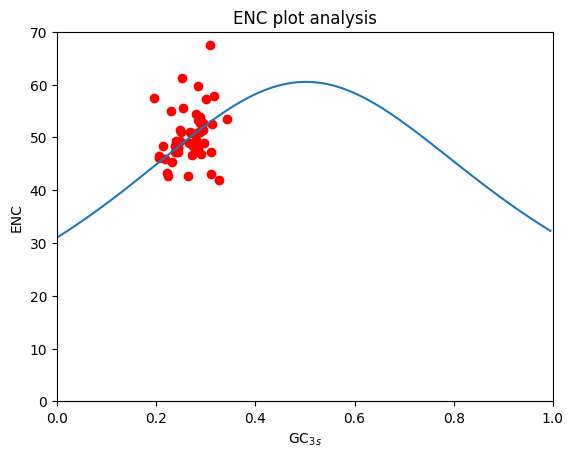

In [3]:
inputfile = '/home/chenguisen/Downloads/sequence (1).txt'
ENCResult = pycubcore.ENC(inputfile, Genetic_Codes=16)
pycubcore.DrawENC(ENCResult, show_label=False)

In [ ]:
"""
The 'effective number of codons' used in a gene


Codon Adaptation Index

Codon Adaptation Index (CAI) (Sharp and Li 1987). CAI is a measurement 
of the relative adaptiveness of the codon usage of a gene towards the  
codon usage of highly expressed genes. The relative adaptiveness (w) of
each codon is the ratio of the usage of each codon, to that of the most
abundant codon for the same amino acid. The relative adaptiveness of   
codons for albeit a limited choice of species, can be selected from the
Menu. The user can also input a personal choice of values. The CAI     
index is defined as the geometric mean of these relative adaptiveness  
values. Non-synonymous codons and termination codons (genetic code     
dependent) are excluded. To aid computation, the CAI is calculated as  
using a natural log summation, To prevent a codon having a relative    
adaptiveness value of zero, which could result in a CAI of zero;       
these codons have fitness of zero (<.0001) are adjusted to 0.01

Codon Bias Index

Codon bias index is a measure of directional codon bias, it measures   
the extent to which a gene uses a subset of optimal codons.            
CBI = ( Nopt-Nran)/(Nopt-Nran) Where Nopt = number of optimal codons;  
Ntot = number of synonymous codons; Nran = expected number of optimal  
codons if codons were assigned randomly. CBI is similar to Fop as used 
by Ikemura, with Nran used as a scaling factor. In a gene with extreme 
codon bias, CBI will equal 1.0, in a gene with random codon usage CBI  
will equal 0.0. Note that it is possible for Nopt to be less than Nran.
This results in a negative value for CBI.                              
( Bennetzen and Hall 1982 )       


Frequency of OPtimal codons

Frequency of Optimal codons (Fop) (Ikemura 1981). This index, is ratio  
of optimal codons to synonymous codons (genetic code dependent). Optimal
codons for several species are in-built and can be selected using Menu 3
By default, the optimal codons of E. coli are assumed. The user may also
enter a personal choice of optimal codons. If rare synonymous codons    
have been identified, there is a choice of calculating the original Fop 
index or a modified index. Fop values for the original index are always 
between 0 (where no optimal codons are used) and 1 (where only optimal  
codons are used). When calculating the modified Fop index, any negative 
values are adjusted to zero.                                            

Effective Number of Codons

The effective number of codons (NC) (Wright 1990). This index is a     
simple measure of overall codon bias and is analogous to the effective 
number of alleles measure used in population genetics. Knowledge of the
optimal codons or a reference set of highly expressed genes is not     
needed when calculating this index. Initially the homozygosity for each
amino acid is estimated from the squared codon frequencies.            

G+C
This function is a real work horse, initially it counts base composit 
ion in all frames, length of gene, num synonymous codons, number of   
non synonymous codons. Then dependent on the value for which used in  
switch statement. We return various analyses of this data             
if which ==1 then the output is very detailed, base by base etc.      
if which ==2 then the output is for GC content only                   
if which ==3 then the output is for GC3s (GC at synonymous 3rd posit) 
if which ==4 then the output is for L_sym                             
if which ==5 then the output is for L_aa                              
The output from this subroutine is in a tabular format if human readable
output is selected, and in columns if machine readable. Also the 
number of values reported changes as it is assumed the user has access
to a spreadsheet type programme if they are requesting tabular output 


Selection of this option calculates four separate indices, i.e. G3s, C3s,
A3s & T3s. Although correlated with GC3s, this index is not directly
comparable. It quantifies the usage of each base at synonymous third codon
positions. When calculating GC3s each synonymous amino acid has at least one
synonym with G or C in the third position. Two or three fold synonymous
amino acids do not have an equal choice between bases in the synonymous
third position. The index A3s is the frequency that codons have an A at their
synonymous third position, relative to the amino acids that could have a
synonym with A in the synonymous third codon position. The codon usage
analysis of Caenorhabditis elegans identified a trend correlated with the
frequency of G3s. Though it was not clear whether it reflected variation in
base composition (or mutational biases) among regions of the C. elegans
genome, or another factor (Stenico et al. 1994).

"""